# custumer_lifetime_value

### IMPORTING LIBRARIES

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


### LOADING DATASET

In [20]:
df=pd.read_csv("F:\DATA SCIENCE PROJECT\ALL\DATASET\CLV history.csv")

### 1st FIVE ROWS OF DATASET

In [21]:
df.head()

,CUST_ID,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
0,1001,150,75,200,100,175,75,13125
1,1002,25,50,150,200,175,200,9375
2,1003,75,150,0,25,75,25,5156
3,1004,200,200,25,100,75,150,11756
4,1005,200,200,125,75,175,200,15525


### SHAPE OF DATA SET

In [23]:
df.shape

(100, 8)

### Statistical Description

In [25]:
df.describe()

,CUST_ID,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1050.500000,113.25000,115.750000,106.250000,106.750000,106.250000,108.500000,9421.190000
std,29.011492,55.32902,64.221739,63.601406,62.649317,59.816111,66.021499,2664.443174
min,1001.000000,25.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4125.000000
25%,1025.750000,75.00000,75.000000,50.000000,50.000000,50.000000,50.000000,7816.000000
50%,1050.500000,100.00000,125.000000,100.000000,100.000000,100.000000,100.000000,9344.000000
75%,1075.250000,150.00000,175.000000,175.000000,150.000000,156.250000,175.000000,10719.250000
max,1100.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,17100.000000


### Check the missing values

In [26]:
print(df.isnull().sum())

CUST_ID    0
MONTH_1    0
MONTH_2    0
MONTH_3    0
MONTH_4    0
MONTH_5    0
MONTH_6    0
CLV        0
dtype: int64


### Feature Selection

In [27]:
#X = df.drop(['CUST_ID','CLV'],axis =1)
X=df.iloc[:,1:7].values
Y = df['CLV']

### SPLITTING DATASET INTO TRAINING AND TESTING
### with testing size 30% and Training Size 70% of total dataset.

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

### Find the Correlation between independent variables

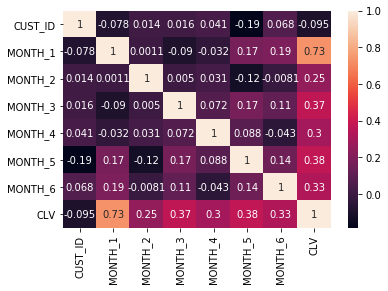

In [33]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Implementation of Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

### Model Fitting and Predicting values of Y_test

In [36]:
model.fit(X_train,Y_train)
pred_reg = model.predict(X_test)
print(pred_reg)

[ 5192.77288323 10457.7272012   5160.83007394 10600.1163661
  6131.24051833  7885.71832746 10738.39957493 10725.17387023
 10244.90652917 10108.07392337 10500.63656933  8517.12751717
  4318.04118645 10784.68735513  8721.51265054 11441.05662767
 10558.10864219  8855.85448325  6722.5062185   8665.04555738
  8239.8244304  11953.71487402 12156.34653595  9880.07740095
 14607.76564772 10408.27856256  9702.13902121  9618.92459266
 12487.06497701 10925.8704647 ]


###  RMSE (Root Mean Square Error)

In [37]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test,pred_reg))
print('rmse:',rmse)

rmse: 692.218814661807


### Coefficient of Model

In [16]:
print(abs(model.coef_))

[33.9689929  12.06450597 15.18308282 12.6615176   7.04700845  6.53580928]


### b0 = Y intercept 

In [17]:
print('B0',model.intercept_)

B0 -204.97909445493679


### Varience Score: 

In [18]:
print('Variance score: {}'.format(model.score(X_test, Y_test)))

Variance score: 0.9117842625633562


### R-Squred 

In [38]:
r2_score = model.score(X_train, Y_train)
print("r2_Score", r2_score)

r2_Score 0.9246843303798283
